In [1]:
import sqlite3
import pandas as pd

db_name = 'db.sqlite3'
con = sqlite3.connect(db_name)

In [2]:
df = pd.read_sql_query('select * from history', con)
df

,id,side,price,size,exec_date,buy_child_order_acceptance_id,sell_child_order_acceptance_id
0,42164424,SELL,455100,0.009999,2017-08-23 23:16:33.633000,JRF20170823-231406-146324,JRF20170823-231633-317358
1,42164427,SELL,455100,0.000001,2017-08-23 23:16:34.997000,JRF20170823-231406-146324,JRF20170824-081628-603206
2,42164428,SELL,455003,0.005390,2017-08-23 23:16:34.997000,JRF20170823-231449-545976,JRF20170824-081628-603206
3,42164429,SELL,455001,0.029526,2017-08-23 23:16:34.997000,JRF20170823-231629-317344,JRF20170824-081628-603206
4,42164436,SELL,454881,0.104443,2017-08-23 23:16:39.687000,JRF20170823-231638-080758,JRF20170823-231640-080761
5,42164437,SELL,454880,0.810000,2017-08-23 23:16:39.687000,JRF20170823-231636-215921,JRF20170823-231640-080761
6,42164438,SELL,454797,1.085557,2017-08-23 23:16:39.687000,JRF20170823-231609-080696,JRF20170823-231640-080761
7,42164439,SELL,454797,1.844443,2017-08-23 23:16:40.170000,JRF20170823-231609-080696,JRF20170823-231640-080762
8,42164440,SELL,454730,0.155557,2017-08-23 23:16:40.170000,JRF20170823-231339-858802,JRF20170823-231640-080762
9,42164447,SELL,454731,0.020893,2017-08-23 23:16:50.190000,JRF20170823-231642-080763,JRF20170823-231650-080771


In [3]:
df.exec_date = pd.to_datetime(df.exec_date)
df = df.set_index('exec_date')
df = df.loc['2000':]
df = df[['id', 'side', 'price', 'size']]

In [4]:
price_resampled = df.price.resample('D')

In [5]:
p1w = price_resampled.mean()#['2017-08-23':'2017-09-10']
p1w

exec_date
2017-08-23    4.561682e+05
2017-08-24    4.612482e+05
2017-08-25    4.761627e+05
2017-08-26    4.739245e+05
2017-08-27    4.766842e+05
2017-08-28    4.715836e+05
2017-08-29    4.864259e+05
2017-08-30    5.031690e+05
2017-08-31    5.151034e+05
2017-09-01    5.314097e+05
2017-09-02    5.271490e+05
2017-09-03    5.213253e+05
2017-09-04    4.960089e+05
2017-09-05    4.750437e+05
2017-09-06    5.023702e+05
2017-09-07    5.023190e+05
2017-09-08    4.810019e+05
2017-09-09    4.662754e+05
2017-09-10    4.495953e+05
2017-09-11    4.585770e+05
2017-09-12    4.640796e+05
2017-09-13    4.347201e+05
2017-09-14    3.829160e+05
2017-09-15    3.672357e+05
2017-09-16    4.074385e+05
2017-09-17    3.989022e+05
2017-09-18    4.322674e+05
2017-09-19    4.403181e+05
2017-09-20    4.345177e+05
2017-09-21    4.234086e+05
                  ...     
2017-12-06    1.437180e+06
2017-12-07    1.813092e+06
2017-12-08    1.981972e+06
2017-12-09    1.749912e+06
2017-12-10    1.669612e+06
2017-12-11    1.91

In [6]:
pw_max = price_resampled.max()#['2017-08-23':'2017-09-10']
pw_min = price_resampled.min()#['2017-08-23':'2017-09-10']
dw = pd.DataFrame([p1w, pw_max, pw_min]).T
dw

,price,price,price
exec_date,,,
2017-08-23,4.561682e+05,458610.0,453575.0
2017-08-24,4.612482e+05,475600.0,451812.0
2017-08-25,4.761627e+05,482000.0,468020.0
2017-08-26,4.739245e+05,478200.0,470630.0
2017-08-27,4.766842e+05,479500.0,474010.0
2017-08-28,4.715836e+05,480000.0,461613.0
2017-08-29,4.864259e+05,502179.0,475500.0
2017-08-30,5.031690e+05,509370.0,492810.0
2017-08-31,5.151034e+05,525500.0,503757.0


In [7]:
dw.columns = ['price', 'day_max', 'day_min']
dw

,price,day_max,day_min
exec_date,,,
2017-08-23,4.561682e+05,458610.0,453575.0
2017-08-24,4.612482e+05,475600.0,451812.0
2017-08-25,4.761627e+05,482000.0,468020.0
2017-08-26,4.739245e+05,478200.0,470630.0
2017-08-27,4.766842e+05,479500.0,474010.0
2017-08-28,4.715836e+05,480000.0,461613.0
2017-08-29,4.864259e+05,502179.0,475500.0
2017-08-30,5.031690e+05,509370.0,492810.0
2017-08-31,5.151034e+05,525500.0,503757.0


In [8]:
dw['max_per'] = dw.day_max / dw.price - 1
dw['min_per'] = dw.day_min / dw.price - 1
dw

,price,day_max,day_min,max_per,min_per
exec_date,,,,,
2017-08-23,4.561682e+05,458610.0,453575.0,0.005353,-0.005685
2017-08-24,4.612482e+05,475600.0,451812.0,0.031115,-0.020458
2017-08-25,4.761627e+05,482000.0,468020.0,0.012259,-0.017101
2017-08-26,4.739245e+05,478200.0,470630.0,0.009022,-0.006951
2017-08-27,4.766842e+05,479500.0,474010.0,0.005907,-0.005610
2017-08-28,4.715836e+05,480000.0,461613.0,0.017847,-0.021143
2017-08-29,4.864259e+05,502179.0,475500.0,0.032385,-0.022462
2017-08-30,5.031690e+05,509370.0,492810.0,0.012324,-0.020588
2017-08-31,5.151034e+05,525500.0,503757.0,0.020183,-0.022028


In [9]:
dw['mean5d'] = dw.price.rolling(5).mean()
dw['max5d'] = dw.day_max.rolling(5).max()
dw['min5d'] = dw.day_min.rolling(5).min()
dw

,price,day_max,day_min,max_per,min_per,mean5d,max5d,min5d
exec_date,,,,,,,,
2017-08-23,4.561682e+05,458610.0,453575.0,0.005353,-0.005685,NaN,NaN,NaN
2017-08-24,4.612482e+05,475600.0,451812.0,0.031115,-0.020458,NaN,NaN,NaN
2017-08-25,4.761627e+05,482000.0,468020.0,0.012259,-0.017101,NaN,NaN,NaN
2017-08-26,4.739245e+05,478200.0,470630.0,0.009022,-0.006951,NaN,NaN,NaN
2017-08-27,4.766842e+05,479500.0,474010.0,0.005907,-0.005610,4.688376e+05,482000.0,451812.0
2017-08-28,4.715836e+05,480000.0,461613.0,0.017847,-0.021143,4.719206e+05,482000.0,451812.0
2017-08-29,4.864259e+05,502179.0,475500.0,0.032385,-0.022462,4.769562e+05,502179.0,461613.0
2017-08-30,5.031690e+05,509370.0,492810.0,0.012324,-0.020588,4.823574e+05,509370.0,461613.0
2017-08-31,5.151034e+05,525500.0,503757.0,0.020183,-0.022028,4.905932e+05,525500.0,461613.0


In [10]:
dw['max5d_next'] = dw.max5d.shift(-5)
dw['min5d_next'] = dw.min5d.shift(-5)
dw['max5d_next_per'] = dw.max5d_next / dw.price - 1
dw['min5d_next_per'] = dw.min5d_next / dw.price - 1
dw

,price,day_max,day_min,max_per,min_per,mean5d,max5d,min5d,max5d_next,min5d_next,max5d_next_per,min5d_next_per
exec_date,,,,,,,,,,,,
2017-08-23,4.561682e+05,458610.0,453575.0,0.005353,-0.005685,NaN,NaN,NaN,482000.0,451812.0,0.056628,-0.009550
2017-08-24,4.612482e+05,475600.0,451812.0,0.031115,-0.020458,NaN,NaN,NaN,502179.0,461613.0,0.088739,0.000791
2017-08-25,4.761627e+05,482000.0,468020.0,0.012259,-0.017101,NaN,NaN,NaN,509370.0,461613.0,0.069739,-0.030556
2017-08-26,4.739245e+05,478200.0,470630.0,0.009022,-0.006951,NaN,NaN,NaN,525500.0,461613.0,0.108826,-0.025978
2017-08-27,4.766842e+05,479500.0,474010.0,0.005907,-0.005610,4.688376e+05,482000.0,451812.0,548000.0,461613.0,0.149608,-0.031617
2017-08-28,4.715836e+05,480000.0,461613.0,0.017847,-0.021143,4.719206e+05,482000.0,451812.0,566350.0,475500.0,0.200954,0.008305
2017-08-29,4.864259e+05,502179.0,475500.0,0.032385,-0.022462,4.769562e+05,502179.0,461613.0,566350.0,492810.0,0.164309,0.013124
2017-08-30,5.031690e+05,509370.0,492810.0,0.012324,-0.020588,4.823574e+05,509370.0,461613.0,566350.0,470600.0,0.125566,-0.064728
2017-08-31,5.151034e+05,525500.0,503757.0,0.020183,-0.022028,4.905932e+05,525500.0,461613.0,566350.0,450000.0,0.099488,-0.126389


In [11]:
dw['mean5d_per'] = 1 - dw.mean5d / dw.price
dw

,price,day_max,day_min,max_per,min_per,mean5d,max5d,min5d,max5d_next,min5d_next,max5d_next_per,min5d_next_per,mean5d_per
exec_date,,,,,,,,,,,,,
2017-08-23,4.561682e+05,458610.0,453575.0,0.005353,-0.005685,NaN,NaN,NaN,482000.0,451812.0,0.056628,-0.009550,NaN
2017-08-24,4.612482e+05,475600.0,451812.0,0.031115,-0.020458,NaN,NaN,NaN,502179.0,461613.0,0.088739,0.000791,NaN
2017-08-25,4.761627e+05,482000.0,468020.0,0.012259,-0.017101,NaN,NaN,NaN,509370.0,461613.0,0.069739,-0.030556,NaN
2017-08-26,4.739245e+05,478200.0,470630.0,0.009022,-0.006951,NaN,NaN,NaN,525500.0,461613.0,0.108826,-0.025978,NaN
2017-08-27,4.766842e+05,479500.0,474010.0,0.005907,-0.005610,4.688376e+05,482000.0,451812.0,548000.0,461613.0,0.149608,-0.031617,0.016461
2017-08-28,4.715836e+05,480000.0,461613.0,0.017847,-0.021143,4.719206e+05,482000.0,451812.0,566350.0,475500.0,0.200954,0.008305,-0.000715
2017-08-29,4.864259e+05,502179.0,475500.0,0.032385,-0.022462,4.769562e+05,502179.0,461613.0,566350.0,492810.0,0.164309,0.013124,0.019468
2017-08-30,5.031690e+05,509370.0,492810.0,0.012324,-0.020588,4.823574e+05,509370.0,461613.0,566350.0,470600.0,0.125566,-0.064728,0.041361
2017-08-31,5.151034e+05,525500.0,503757.0,0.020183,-0.022028,4.905932e+05,525500.0,461613.0,566350.0,450000.0,0.099488,-0.126389,0.047583


In [12]:
%matplotlib inline

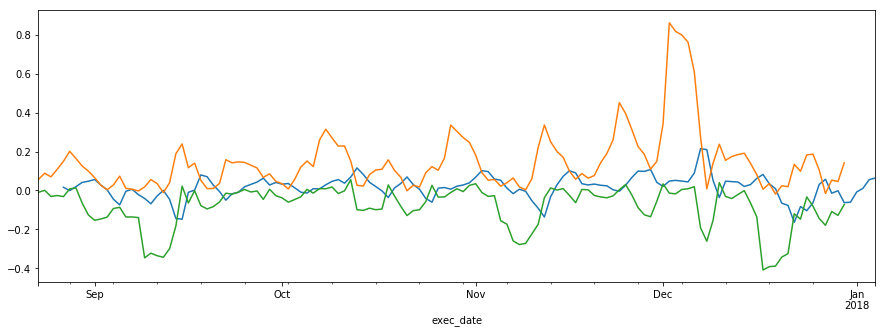

In [13]:
dw.mean5d_per.plot(figsize=(15, 5))
dw.max5d_next_per.plot()
dw.min5d_next_per.plot()

In [14]:
dwr = dw[dw.max5d_next_per.notnull() & dw.mean5d_per.notnull()]
dwr

,price,day_max,day_min,max_per,min_per,mean5d,max5d,min5d,max5d_next,min5d_next,max5d_next_per,min5d_next_per,mean5d_per
exec_date,,,,,,,,,,,,,
2017-08-27,4.766842e+05,479500.0,474010.0,0.005907,-0.005610,4.688376e+05,482000.0,451812.0,548000.0,461613.0,0.149608,-0.031617,0.016461
2017-08-28,4.715836e+05,480000.0,461613.0,0.017847,-0.021143,4.719206e+05,482000.0,451812.0,566350.0,475500.0,0.200954,0.008305,-0.000715
2017-08-29,4.864259e+05,502179.0,475500.0,0.032385,-0.022462,4.769562e+05,502179.0,461613.0,566350.0,492810.0,0.164309,0.013124,0.019468
2017-08-30,5.031690e+05,509370.0,492810.0,0.012324,-0.020588,4.823574e+05,509370.0,461613.0,566350.0,470600.0,0.125566,-0.064728,0.041361
2017-08-31,5.151034e+05,525500.0,503757.0,0.020183,-0.022028,4.905932e+05,525500.0,461613.0,566350.0,450000.0,0.099488,-0.126389,0.047583
2017-09-01,5.314097e+05,548000.0,520030.0,0.031219,-0.021414,5.015383e+05,548000.0,461613.0,566350.0,450000.0,0.065750,-0.153196,0.056212
2017-09-02,5.271490e+05,566350.0,502000.0,0.074364,-0.047708,5.126514e+05,566350.0,475500.0,541100.0,450000.0,0.026465,-0.146351,0.027502
2017-09-03,5.213253e+05,541100.0,501100.0,0.037932,-0.038796,5.196313e+05,566350.0,492810.0,523270.0,450000.0,0.003730,-0.136815,0.003249
2017-09-04,4.960089e+05,523270.0,470600.0,0.054961,-0.051227,5.181993e+05,566350.0,470600.0,510000.0,450000.0,0.028207,-0.092758,-0.044738


In [15]:
dwr[(dwr.max5d_next_per > 0.02)].shape, dwr[(dwr.mean5d_per < 0) & (dwr.max5d_next_per > 0.02)].shape

((108, 13), (34, 13))

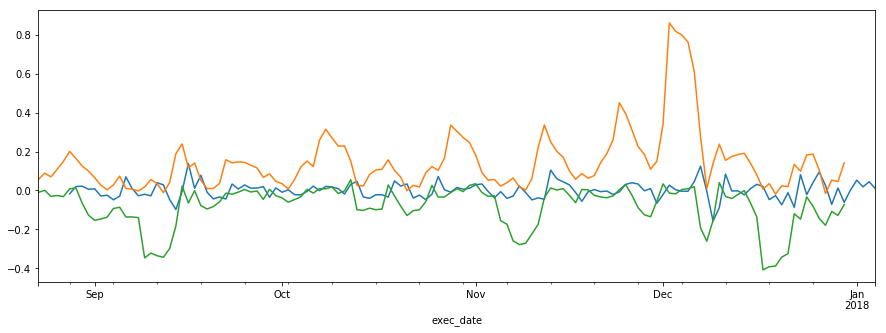

In [16]:
dw['day_diff'] = dw.mean5d_per - dw.mean5d_per.shift()
dw.day_diff.plot(figsize=(15, 5))
dw.max5d_next_per.plot()
dw.min5d_next_per.plot()

In [19]:
dw['diff_pulse'] = 0
dw.diff_pulse[dw.day_diff > 0] = 0.1
dw.diff_pulse[dw.day_diff < 0] = -0.1
dw

C:\Users\s-tutumi\AppData\Local\conda\conda\envs\py_analyze\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,price,day_max,day_min,max_per,min_per,mean5d,max5d,min5d,max5d_next,min5d_next,max5d_next_per,min5d_next_per,mean5d_per,day_diff,diff_pulse
exec_date,,,,,,,,,,,,,,,
2017-08-23,4.561682e+05,458610.0,453575.0,0.005353,-0.005685,NaN,NaN,NaN,482000.0,451812.0,0.056628,-0.009550,NaN,NaN,0.0
2017-08-24,4.612482e+05,475600.0,451812.0,0.031115,-0.020458,NaN,NaN,NaN,502179.0,461613.0,0.088739,0.000791,NaN,NaN,0.0
2017-08-25,4.761627e+05,482000.0,468020.0,0.012259,-0.017101,NaN,NaN,NaN,509370.0,461613.0,0.069739,-0.030556,NaN,NaN,0.0
2017-08-26,4.739245e+05,478200.0,470630.0,0.009022,-0.006951,NaN,NaN,NaN,525500.0,461613.0,0.108826,-0.025978,NaN,NaN,0.0
2017-08-27,4.766842e+05,479500.0,474010.0,0.005907,-0.005610,4.688376e+05,482000.0,451812.0,548000.0,461613.0,0.149608,-0.031617,0.016461,NaN,0.0
2017-08-28,4.715836e+05,480000.0,461613.0,0.017847,-0.021143,4.719206e+05,482000.0,451812.0,566350.0,475500.0,0.200954,0.008305,-0.000715,-0.017176,-0.1
2017-08-29,4.864259e+05,502179.0,475500.0,0.032385,-0.022462,4.769562e+05,502179.0,461613.0,566350.0,492810.0,0.164309,0.013124,0.019468,0.020183,0.1
2017-08-30,5.031690e+05,509370.0,492810.0,0.012324,-0.020588,4.823574e+05,509370.0,461613.0,566350.0,470600.0,0.125566,-0.064728,0.041361,0.021893,0.1
2017-08-31,5.151034e+05,525500.0,503757.0,0.020183,-0.022028,4.905932e+05,525500.0,461613.0,566350.0,450000.0,0.099488,-0.126389,0.047583,0.006222,0.1


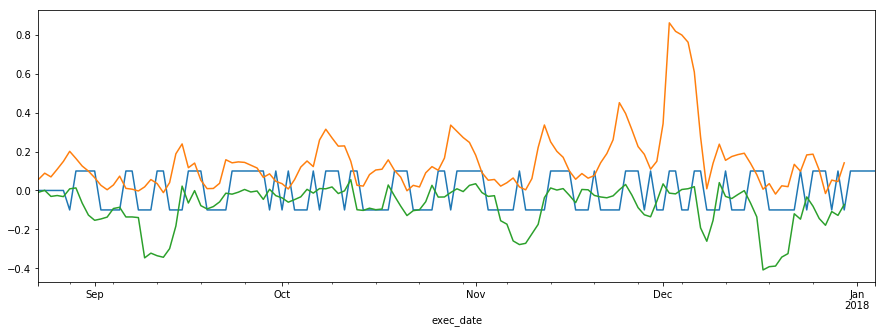

In [20]:
dw.diff_pulse.plot(figsize=(15, 5))
dw.max5d_next_per.plot()
dw.min5d_next_per.plot()

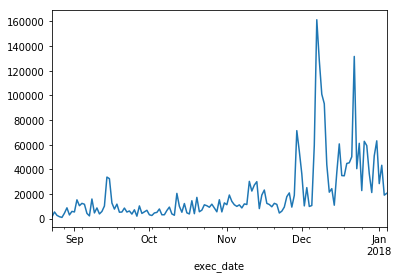

In [21]:
std_day = df.price.resample('D').std()
std_day.plot()

C:\Users\s-tutumi\AppData\Local\conda\conda\envs\py_analyze\lib\site-packages\pandas\core\ops.py:622: FutureWarning: 
.resample() is now a deferred operation
You called index(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  if not left.index.equals(right.index):
C:\Users\s-tutumi\AppData\Local\conda\conda\envs\py_analyze\lib\site-packages\pandas\core\common.py:135: FutureWarning: 
.resample() is now a deferred operation
You called name(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  b_has = hasattr(b, 'name')
C:\Users\s-tutumi\AppData\Local\conda\conda\envs\py_analyze\lib\site-packages\pandas\core\common.py:137: FutureWarning: 
.resample() is now a deferred operation
You called name(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  if a.n

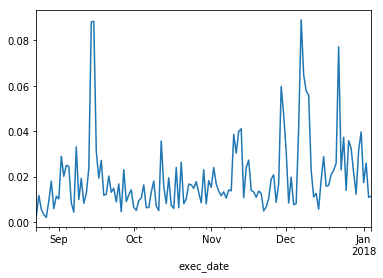

In [22]:
(std_day / price_resampled).plot()

C:\Users\s-tutumi\AppData\Local\conda\conda\envs\py_analyze\lib\site-packages\pandas\core\ops.py:622: FutureWarning: 
.resample() is now a deferred operation
You called index(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  if not left.index.equals(right.index):
C:\Users\s-tutumi\AppData\Local\conda\conda\envs\py_analyze\lib\site-packages\pandas\core\common.py:135: FutureWarning: 
.resample() is now a deferred operation
You called name(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  b_has = hasattr(b, 'name')
C:\Users\s-tutumi\AppData\Local\conda\conda\envs\py_analyze\lib\site-packages\pandas\core\common.py:137: FutureWarning: 
.resample() is now a deferred operation
You called name(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  if a.n

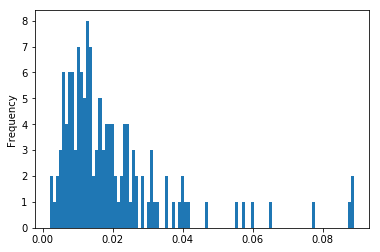

In [23]:
(std_day / price_resampled).plot.hist(bins=100)

In [24]:
min_price = df.price.resample('1Min').mean()
min_price.shape

(191900,)

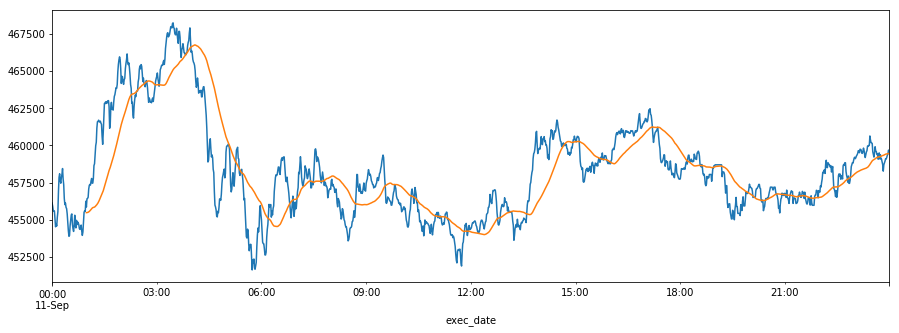

In [29]:
price_range = min_price['2017-09-11':'2017-09-11'].fillna(method='ffill')
price_range.plot(figsize=(15, 5))
price_range.rolling(60).mean().plot()